# Harrison Oates 5508 Assignment 1
CITS5508 - Harrison Oates (22966832)

## 1 - Data and Preprocessing
---

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

testing = pd.read_csv("testing.csv")
training = pd.read_csv("training.csv")

print(testing.head(5))
print(testing.info())

print(training.info())
print(training.head(5))

ModuleNotFoundError: No module named 'sklearn'

In [20]:
#Remove the columns that start with pred_minus_obs

train_data = training.loc[:, ~training.columns.str.startswith("pred_minus_obs")]

test_data = testing.loc[:, ~testing.columns.str.startswith("pred_minus_obs")]

#check to see that the only features remaining is b1-b9
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   325 non-null    object
 1   b1      325 non-null    int64 
 2   b2      325 non-null    int64 
 3   b3      325 non-null    int64 
 4   b4      325 non-null    int64 
 5   b5      325 non-null    int64 
 6   b6      325 non-null    int64 
 7   b7      325 non-null    int64 
 8   b8      325 non-null    int64 
 9   b9      325 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 25.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   198 non-null    object
 1   b1      198 non-null    int64 
 2   b2      198 non-null    int64 
 3   b3      198 non-null    int64 
 4   b4      198 non-null    int64 
 5   b5      198 non-null    int64 
 6   b6      1

### 1.1 Raw Data Loading
- both the testing and training sets are loaded in from the testing.csv and training.csv files, the first 5 rows of these datasets along with their infos are printed to ensure that the loaded datasets match what was seen in the csv file.
- the datasets then have the columns that start with 'pred_minus_obs' removed and the resulting info printed to ensure the only remaining classes are b1-b9

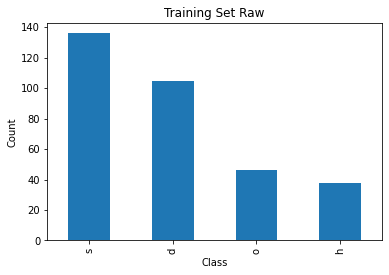

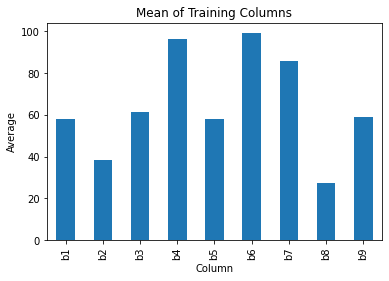

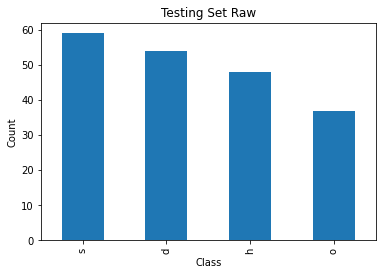

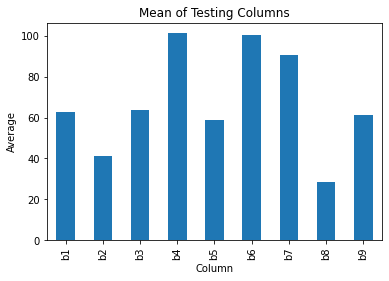

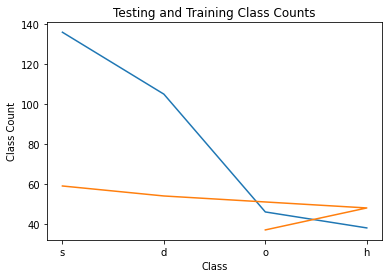

In [40]:
# Training set class value counts
train_data["class"].value_counts().plot.bar(title ="Training Set Raw")
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Training set mean of columns
train_data.drop(columns=["class"]).mean(axis = 0).plot.bar(title ="Mean of Training Columns")
plt.xlabel('Column')
plt.ylabel('Average')
plt.show()

# Testing set class value counts
test_data["class"].value_counts().plot.bar(title ="Testing Set Raw")
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Testing set mean of columns
test_data.drop(columns=["class"]).mean(axis = 0).plot.bar(title ="Mean of Testing Columns")
plt.xlabel('Column')
plt.ylabel('Average')
plt.show()

# Plotting both of the class counts ontop of eachother to see any imbalances
training_class_counts = train_data['class'].value_counts()
testing_class_counts = test_data['class'].value_counts()
plt.plot(training_class_counts, label="training class counts")
plt.plot(testing_class_counts, label="testing class counts")
plt.title("Testing and Training Class Counts")
plt.ylabel("Class Count")
plt.xlabel("Class")
plt.show()

### 1.2 - Plots
---
- The above plots in section *1.2* show that there is a clear imbalance in our training and testing sets with a large discrepancy between the distribution of classes
- This can be rectified in a number of ways with the sklearn.preprocessing package but I will focus on the min max scaler